In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
bbar = pickle.load(open("./cache/tng50_bbar.pkl", "rb"))
tbar = pickle.load(open("./cache/tng50_tbar.pkl", "rb"))
bdmo = pickle.load(open("./cache/tng50_bdmo.pkl", "rb"))
tdmo = pickle.load(open("./cache/tng50_tdmo.pkl", "rb") )
matches = pickle.load(open("./cache/matches_tng50.pkl", "rb") )

In [66]:
bdmo

array([(100, 1.4952888e+14, 1.4952888e+14, False),
       (100, 9.5711872e+08, 9.5711872e+08, False),
       (100, 9.3377434e+08, 9.3377434e+08, False), ...,
       (100, 7.4701952e+08, 7.4701952e+08, False),
       (100, 5.6026464e+08, 5.6026464e+08, False),
       (100, 0.0000000e+00, 0.0000000e+00,  True)],
      dtype=[('infall_snap', '<i4'), ('mpeak', '<f4'), ('mpeak_pre', '<f4'), ('is_err', '?')])

In [3]:
len(matches), len(tdmo), len(tbar), tdmo['mvir'].shape, 

(813083, 760824, 813083, (760824, 100))

In [43]:
# idx_cut, = np.where(np.log10(bdmo['mpeak_pre']) > 11.8)
# ii = np.random.choice(idx_cut)

# np.log10(tdmo['mvir'][:,-1][ii]), np.log10(bdmo['mpeak_pre'][ii])

In [5]:
# subfind_id_z0 = tdmo['subfind_id'][:,-1]
# subfind_id_z0[subfind_id_z0!=-1]

In [47]:
# extract haloes and MAHs within given present-day mass range
# with no errors, exist in present day and matches with DMO 
mah_dmo = [] 
mah_bar = []
dmo_id = [] 
bar_id = []

# questions: 

for ii in tqdm(range(len(tbar))):
    match = matches[ii]
    if match != -1: 
        
        # TODO: TAKE mah upto infall snap and keep it constant after 
        
        ok_dmo = ~bdmo['is_err'][match]
        ok_bar = ~bbar['is_err'][ii]
        
        mvir_dmo = tdmo['mdm'][match]
        mvir_bar = tbar['mdm'][ii]
        assert mvir_dmo.shape == (100,)
        dmo_mah = np.log10(mvir_dmo, out=np.zeros_like(mvir_dmo), where=(mvir_dmo!=0))
        bar_mah = np.log10(mvir_bar, out=np.zeros_like(mvir_bar), where=(mvir_bar!=0))

        # extract id (present)
        dmo_subfind_id = tdmo['subfind_id'][match, -1]
        bar_subfind_id = tbar['subfind_id'][ii, -1]

        
        # should also check if halo exists in present day
        mpeak_pre_dmo = np.log10(bdmo['mpeak_pre'][match])
        mpeak_pre_bar = np.log10(bbar['mpeak_pre'][ii])
        
        is_cut_dmo = (mpeak_pre_dmo > 11) & ( mpeak_pre_dmo < 12) & (tdmo['mvir'][match,-1] > 0)
        is_cut_bar = (mpeak_pre_bar > 11) & ( mpeak_pre_bar < 12) & (tbar['mvir'][ii,-1] > 0)
        
        if ok_dmo & is_cut_dmo & ok_bar & is_cut_bar:
            mah_dmo.append(dmo_mah)
            mah_bar.append(bar_mah)
            dmo_id.append(dmo_subfind_id)
            bar_id.append(bar_subfind_id)



100%|██████████| 813083/813083 [00:10<00:00, 75903.58it/s] 


In [46]:
tbar

array([[(0.       , 0.0000000e+00, [    0.    ,     0.    ,     0.    ],   0.     , [    0.    ,     0.    ,     0.    ], 0.0000000e+00, 0., 0.0000000e+00, 0., -1, False, 0, False),
        (0.       , 0.0000000e+00, [    0.    ,     0.    ,     0.    ],   0.     , [    0.    ,     0.    ,     0.    ], 0.0000000e+00, 0., 0.0000000e+00, 0., -1, False, 0, False),
        (0.       , 0.0000000e+00, [    0.    ,     0.    ,     0.    ],   0.     , [    0.    ,     0.    ,     0.    ], 0.0000000e+00, 0., 0.0000000e+00, 0., -1, False, 0, False),
        ...,
        (1.0877997, 1.4884083e+14, [ 7309.634 , 24567.184 , 21322.438 ], 864.9844 , [ 7309.634 , 24567.184 , 21322.438 ], 1.2042545e+14, 0., 1.2042545e+14, 0.,  0, False, 0,  True),
        (1.0859094, 1.5058102e+14, [ 7308.2515, 24563.168 , 21311.865 ], 868.93256, [ 7308.2515, 24563.168 , 21311.865 ], 1.2032505e+14, 0., 1.2032505e+14, 0.,  0, False, 0,  True),
        (1.0828183, 1.5105009e+14, [ 7306.8   , 24560.562 , 21305.295 ], 872.

In [49]:
# stack them into arrays
_mah_dmo = np.concatenate([m.reshape(1, 100) for m in mah_dmo], axis=0)
_mah_bar = np.concatenate([m.reshape(1, 100) for m in mah_bar], axis=0)
_dmo_id = np.array(dmo_id)
_bar_id = np.array(bar_id)

_mah_dmo.shape, _mah_bar.shape, _dmo_id.shape, _bar_id.shape

((1406, 100), (1406, 100), (1406,), (1406,))

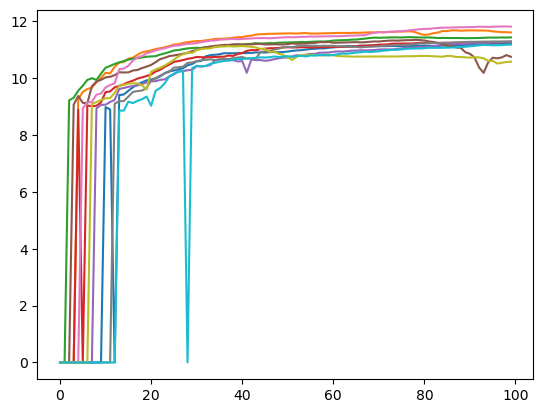

In [62]:
# plot some random trees
indices = np.random.choice(list(range(len(_mah_dmo))), size=10)
for t in _mah_dmo[indices]:
    plt.plot(t)

# NOTES
# * snapshots thart are valid are those with non-zero mass (subfind has problem where it can miss a snapshot)
# * mass switches -->>> sudden rises, halo falls into a much larger halo and could become a splashback halo, in the next snapshot the central 
# host mass jump at merger time, could be Group_M_Top_Hat200; or mass switches
# * what is the mass used? 
# 'mvir' -> group mass 
# 'mdm' -> subhalo mass
# 'mpeak_pre' -> calculate from mvir ; prior to infall

# keep mpeak what it was before infall
# TODO: remove snapshots from trees where it falls to 0 or interpolate

In [12]:
# read tng snapshots
snap1= "../read_tng/data/TNG50_3/snapshot/snap_099.0.hdf5"

In [15]:
import h5py
f = h5py.File(snap1,'r')

In [30]:
f.keys()

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0', 'PartType1', 'PartType3', 'PartType4', 'PartType5']>

In [42]:
f['Header']

<HDF5 group "/Header" (0 members)>

In [13]:
from astropy.io.misc.hdf5 import read_table_hdf5
read_table_hdf5(snap1)

ValueError: no table found in HDF5 group None

In [ ]:
Table.re

In [56]:
len(dmo_id)

145

In [52]:
sum(matches!=-1), len(matches)

(307653, 813083)

In [45]:
mvir = tdmo['mvir'][:, -1]
sum((mvir>0) & (np.log10(bdmo['mpeak_pre']) > 11) & (np.log10(bdmo['mpeak_pre']) < 12) & (~bdmo['is_err']))

/tmp/ipykernel_1143108/3116376147.py:2: RuntimeWarning: divide by zero encountered in log10
  sum((mvir>0) & (np.log10(bdmo['mpeak_pre']) > 11) & (np.log10(bdmo['mpeak_pre']) < 12) & (~bdmo['is_err']))


1795

In [53]:
mvir = tbar['mvir'][:, -1]
sum((mvir>0) & (np.log10(bbar['mpeak_pre']) > 11) & (np.log10(bbar['mpeak_pre']) < 12) & (~bbar['is_err']) &(matches!=-1))

/tmp/ipykernel_1143108/959766558.py:2: RuntimeWarning: divide by zero encountered in log10
  sum((mvir>0) & (np.log10(bbar['mpeak_pre']) > 11) & (np.log10(bbar['mpeak_pre']) < 12) & (~bbar['is_err']) &(matches!=-1))


1538

In [8]:
host_bar = np.argmax(bbar["mpeak"])


In [11]:
bbar['mpeak'].shape

(813083,)

In [7]:
bdmo['mpeak_pre'].shape, tdmo['mvir'].shape, matches.shape, bbar['mpeak_pre'].shape, tbar['mvir'].shape

((760824,), (760824, 100), (813083,), (813083,), (813083, 100))

In [6]:
matches

array([6841,   -1,   -1, ...,   -1,   -1,   -1])

In [35]:
tdmo['mvir'][10].shape

(100,)

/tmp/ipykernel_1886444/4269425887.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(tdmo['mvir'][200]))


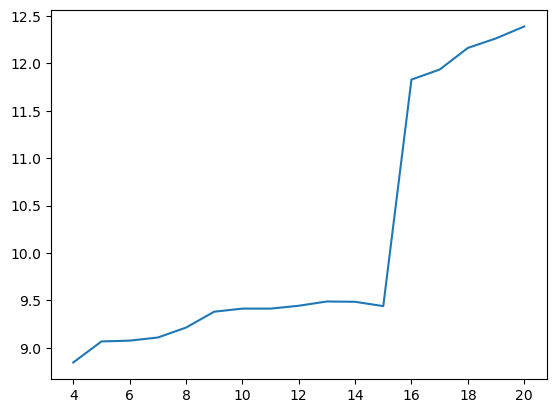

In [37]:
plt.plot(np.log10(tdmo['mvir'][200]))

In [15]:
mpeak_pre = bdmo['mpeak_pre'] 

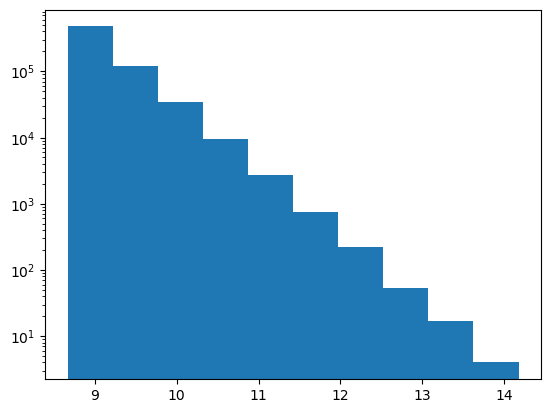

In [30]:
_mpeak_pre = np.log10(mpeak_pre[mpeak_pre > 0])
plt.hist(_mpeak_pre)
plt.yscale('log')

In [26]:
np.percentile(mpeak_pre, 20)

513575904.0